```
df['Predicted_Close'] = cls.predict(X): This line predicts the 'Close' column based on the features using the trained SVM classifier.

df['Return'] = df['Close'].pct_change(): Calculates the daily percentage change in the 'Close' column, representing the return.

df['Close_Return'] = df['Return'] * df['Predicted_Close'].shift(1): Multiplies the predicted signal (shifted by one day to align with the return) with the daily return. This likely represents a strategy where the predicted signal is used to calculate returns on the following day.

df['Cum_Ret'] = df['Return'].cumsum(): Computes the cumulative sum of daily returns, resulting in the overall cumulative return.

df['Cum_Strategy'] = df['Close_Return'].cumsum(): Calculates the cumulative return generated by the strategy based on the predicted signals. This column accumulates the returns generated by the strategy day by day.

So, df['Cum_Strategy'] is essentially a cumulative sum of the returns generated by the strategy that uses predicted signals from the SVM model applied to the 'Close' column. It shows how the strategy's returns accumulate over time based on those predictions.
```



In [8]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       305
           1       0.73      1.00      0.85       840

    accuracy                           0.73      1145
   macro avg       0.37      0.50      0.42      1145
weighted avg       0.54      0.73      0.62      1145


Confusion Matrix:
[[  0 305]
 [  0 840]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Cross-Validation Mean Accuracy: 0.73 with Std: 0.00


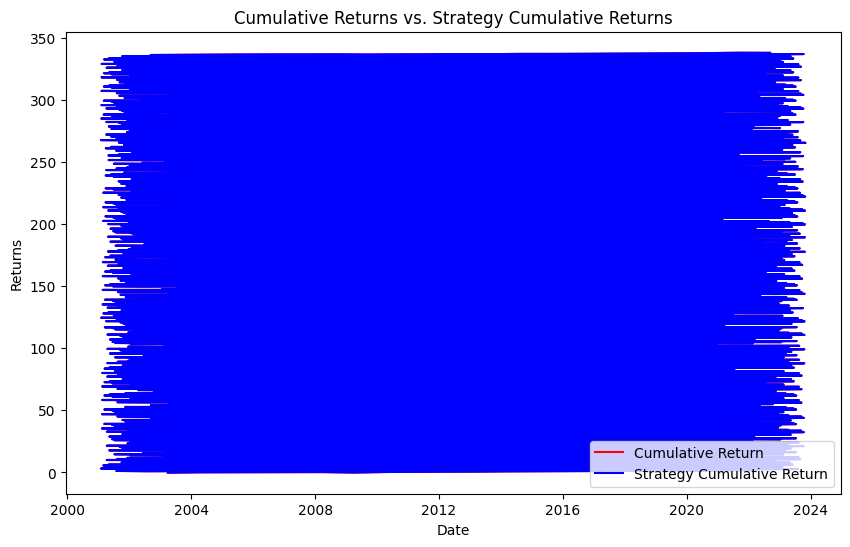

In [4]:
# Libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
file_path = '/content/drive/MyDrive/Stock price predict(Saify)/cleand_SANDP500.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Define Features and Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# Train-Test Split
split_percentage = 0.8
split = int(split_percentage * len(df))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Support Vector Classifier
cls = SVC(kernel='rbf', C=1, gamma='scale')
cls.fit(X_train, y_train)

# Predictions
y_pred = cls.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Cross-validation
scores = cross_val_score(cls, X, y, cv=10)
print(f"\nCross-Validation Mean Accuracy: {scores.mean():.2f} with Std: {scores.std():.2f}")

# Plotting
df['Predicted_Close'] = cls.predict(X)
df['Return'] = df['Close'].pct_change()
df['Close_Return'] = df['Return'] * df['Predicted_Close'].shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Close_Return'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(df['Cum_Ret'], color='red', label='Cumulative Return')
plt.plot(df['Cum_Strategy'], color='blue', label='Strategy Cumulative Return')
plt.legend()
plt.title('Cumulative Returns vs. Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()


In [5]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


<ipython-input-5-da380ff32ba9>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Stock price predict(Saify)/cleand_SANDP500.csv', date_parser=True) #include the file path here
df.shape
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2002-04-01,1147.39,1147.84,1132.87,1146.54,1146.54,1.050900e+09
1,2003-04-01,848.18,861.28,847.85,858.48,858.48,1.461600e+09
2,2004-04-01,1126.21,1135.67,1126.20,1132.17,1132.17,1.560700e+09
3,2005-04-01,1180.59,1189.80,1169.91,1172.92,1172.92,2.168690e+09
4,2008-04-01,1326.41,1370.18,1326.41,1370.18,1370.18,4.745120e+09


In [10]:
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2002-04-01,1147.39,1147.84,1132.87,1146.54,1146.54,1.050900e+09
2003-04-01,848.18,861.28,847.85,858.48,858.48,1.461600e+09
2004-04-01,1126.21,1135.67,1126.20,1132.17,1132.17,1.560700e+09
2005-04-01,1180.59,1189.80,1169.91,1172.92,1172.92,2.168690e+09
2008-04-01,1326.41,1370.18,1326.41,1370.18,1370.18,4.745120e+09
...,...,...,...,...,...,...
2016-09-09,2169.08,2169.08,2127.81,2127.81,2127.81,4.233960e+09
2019-09-09,2988.43,2989.43,2969.39,2978.43,2978.43,4.031120e+09
2020-09-09,3369.82,3424.77,3366.84,3398.96,3398.96,3.932520e+09


In [11]:
X = df[['Open',	'High',	'Low','Volume']]
X.head()

,Open,High,Low,Volume
Date,,,,
2002-04-01,1147.39,1147.84,1132.87,1.050900e+09
2003-04-01,848.18,861.28,847.85,1.461600e+09
2004-04-01,1126.21,1135.67,1126.20,1.560700e+09
2005-04-01,1180.59,1189.80,1169.91,2.168690e+09
2008-04-01,1326.41,1370.18,1326.41,4.745120e+09


In [12]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 1, ..., 1, 0, 0])

In [13]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [14]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [15]:
df['Predicted_Close'] = cls.predict(X)

In [16]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [19]:
# Calculate strategy returns
df['Close_Return'] = df.Return *df.Predicted_Signal.shift(1)

AttributeError: ignored

In [18]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj_Close,Volume,Predicted_Close,Return,Cum_Ret
Date,,,,,,,,,
2002-04-01,1147.39,1147.84,1132.87,1146.54,1146.54,1.050900e+09,1,NaN,NaN
2003-04-01,848.18,861.28,847.85,858.48,858.48,1.461600e+09,1,-0.251243,-0.251243
2004-04-01,1126.21,1135.67,1126.20,1132.17,1132.17,1.560700e+09,1,0.318808,0.067565
2005-04-01,1180.59,1189.80,1169.91,1172.92,1172.92,2.168690e+09,1,0.035993,0.103558
2008-04-01,1326.41,1370.18,1326.41,1370.18,1370.18,4.745120e+09,1,0.168179,0.271736
...,...,...,...,...,...,...,...,...,...
2016-09-09,2169.08,2169.08,2127.81,2127.81,2127.81,4.233960e+09,1,0.095657,337.318335
2019-09-09,2988.43,2989.43,2969.39,2978.43,2978.43,4.031120e+09,1,0.399763,337.718098
2020-09-09,3369.82,3424.77,3366.84,3398.96,3398.96,3.932520e+09,1,0.141192,337.859290


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Close_Return'].cumsum()
df

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [ ]:
cls.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))